In [ ]:
# Nilesh kale (AI3005)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the California Housing dataset
california = fetch_california_housing()
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data=california.data, columns=california.feature_names)
# Add the target variable 'MedHouseVal' as a new column to the DataFrame df['MedHouseVal'] = pd.Series(california.target, name='MedHouseVal')
df['MedHouseVal'] = pd.Series(california.target, name='MedHouseVal')

In [ ]:
 df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
#Split the data into X features and Y-target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [ ]:
 # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
LinearRegression()

LinearRegression()

In [ ]:
 # Predict the target values for the test set
y_pred = model.predict(X_test)
 # Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


#Adding Statistical Analysis.
print('Mean of data is',np.mean(df))
print(f'Median of data is:{np.median(df)}')
print(f'Variance  of data is:{np.var(df)}')
print(f'Standard Deviation  of data is:{np.std(df)}')


Mean Absolute Error (MAE): 0.5332001304956564
Mean Squared Error (MSE): 0.5558915986952441
R-squared (R²): 0.575787706032451
Mean of data is 153.9682163133476
Median of data is:3.8660718068535824
Variance  of data is:MedInc         3.609148e+00
HouseAge       1.583886e+02
AveRooms       6.121236e+00
AveBedrms      2.245806e-01
Population     1.282408e+06
AveOccup       1.078648e+02
Latitude       4.562072e+00
Longitude      4.013945e+00
MedHouseVal    1.331550e+00
dtype: float64
Standard Deviation  of data is:MedInc            1.899776
HouseAge         12.585253
AveRooms          2.474113
AveBedrms         0.473899
Population     1132.434688
AveOccup         10.385798
Latitude          2.135901
Longitude         2.003483
MedHouseVal       1.153928
dtype: float64


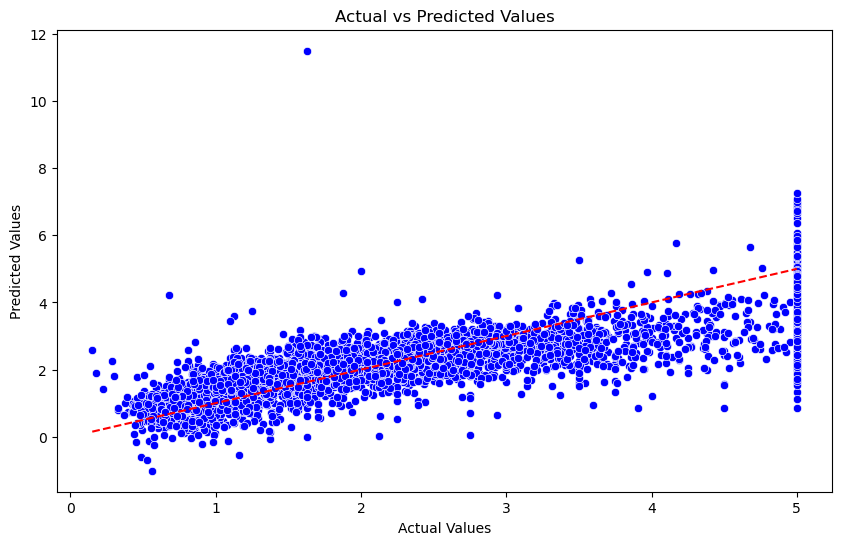

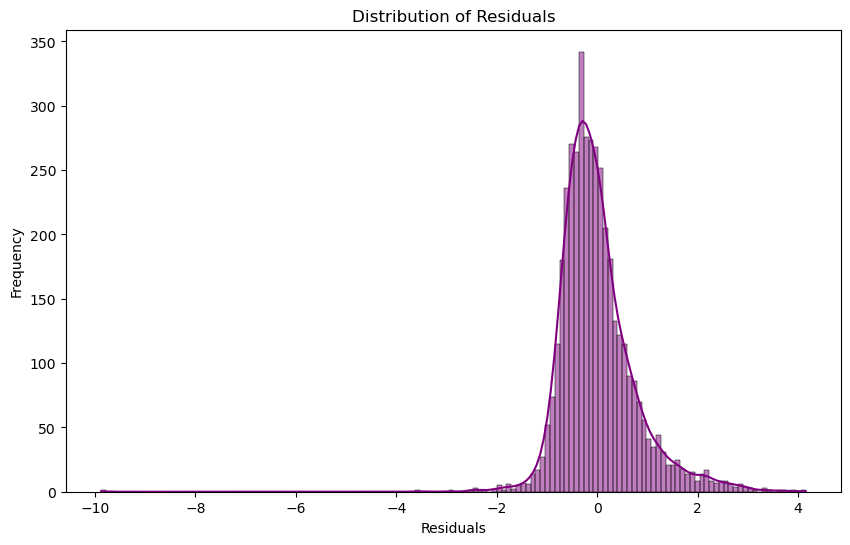

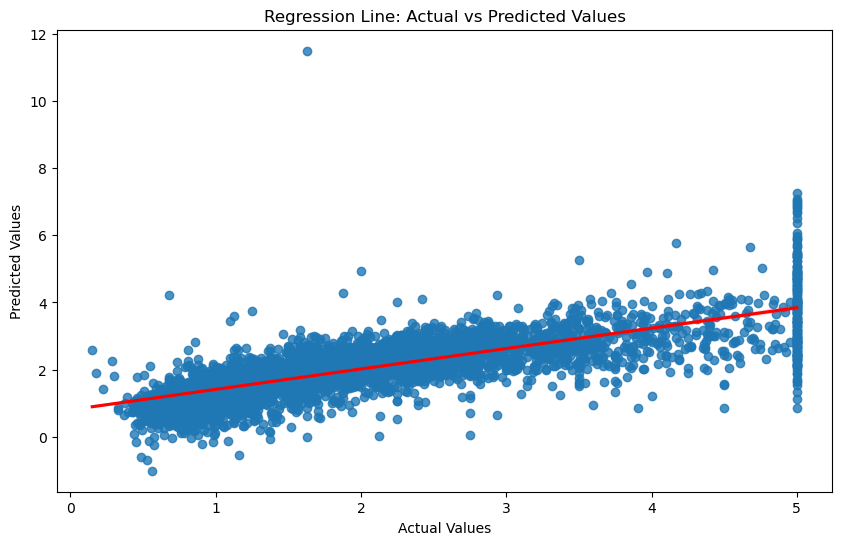

In [ ]:
# Visualization: Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()],color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
# Visualization: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
# Visualization: Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"}), plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Line: Actual vs Predicted Values')
plt.show()

In [ ]:
#Performance matrix for Classification Problem
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report
# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
target_names = breast_cancer.target_names
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
# Standardize the features -- scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
# Train a Support Vector Classifier (SVC)
model = SVC()
model.fit(X_train, y_train)
# Predict the labels on the test set
y_pred = model.predict(X_test)
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [ ]:
# Print the evaluation metrics in a tabular format
metrics_table = [
["Accuracy", f"{accuracy:.2f}"],
["Precision", f"{precision:.2f}"],
["Recall", f"{recall:.2f}"],
["F1-Score", f"{f1:.2f}"]
]

print("Evaluation Metrics:")
print(tabulate(metrics_table, headers=["Metric", "Score"],tablefmt="fancy_grid"))
# Print detailed classification report
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=target_names,output_dict=True)
print(classification_report(y_test, y_pred, target_names=target_names))

Evaluation Metrics:
╒═══════════╤═════════╕
│ Metric    │   Score │
╞═══════════╪═════════╡
│ Accuracy  │    0.98 │
├───────────┼─────────┤
│ Precision │    0.98 │
├───────────┼─────────┤
│ Recall    │    0.98 │
├───────────┼─────────┤
│ F1-Score  │    0.98 │
╘═══════════╧═════════╛

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



<Figure size 800x600 with 0 Axes>

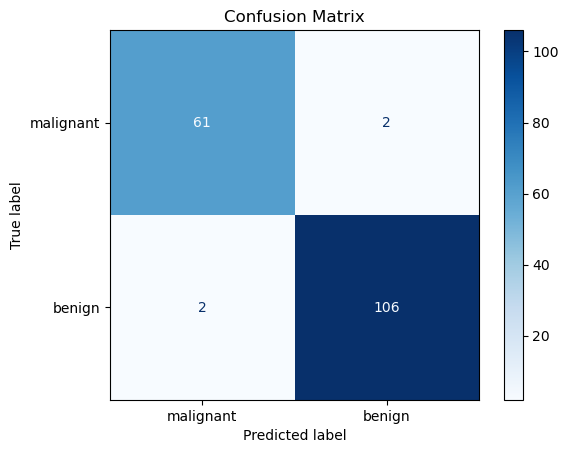

In [ ]:
 # Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


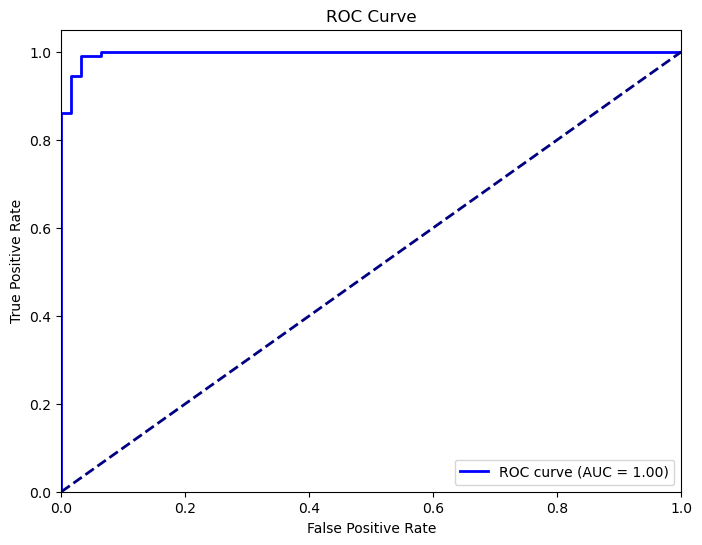

In [ ]:
# ROC Data Visualization for classification.
from sklearn.metrics import roc_curve, auc
# Initialize the SVC model with probability=True
model = SVC(probability=True, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Calculate the ROC curve and AUC for the classifier
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Evaluation Metrics for Different Classifiers:
╒═══════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Classifier    │   Accuracy │   Precision │   Recall │   F1-Score │
╞═══════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Random Forest │       0.97 │        0.96 │     0.99 │       0.98 │
╘═══════════════╧════════════╧═════════════╧══════════╧════════════╛


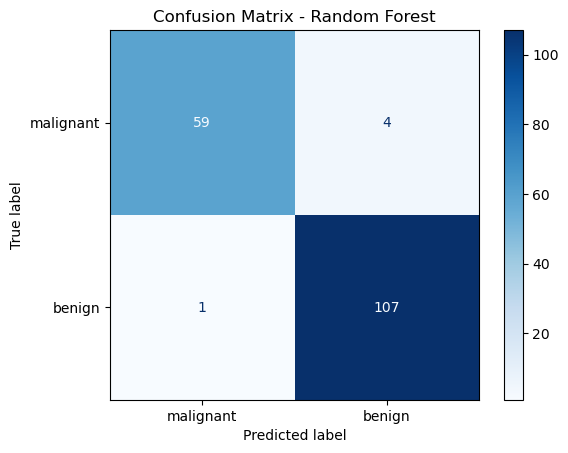

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tabulate import tabulate

classifiers = {
    "Support Vector Classifier (SVC)": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Dictionary to store evaluation metrics
results = {}


 # Store results
results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC Curve": (fpr, tpr, roc_auc),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }

# Display the evaluation metrics in a table
print("Evaluation Metrics for Different Classifiers:")
metrics_table = [
    [name, f"{metrics['Accuracy']:.2f}",
     f"{metrics['Precision']:.2f}",
     f"{metrics['Recall']:.2f}",
     f"{metrics['F1-Score']:.2f}"]
    for name, metrics in results.items()
]
print(tabulate(metrics_table, headers=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"], tablefmt="fancy_grid"))

# Plot confusion matrices
for name, metrics in results.items():
    cm = metrics["Confusion Matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()